In [24]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

Para comparar datos primero se hace en scipy

In [8]:
#x, y, error
f = np.load('fit_exercise.npy')
x = f[0]
y = f[1]
err = f[2]

<ErrorbarContainer object of 3 artists>

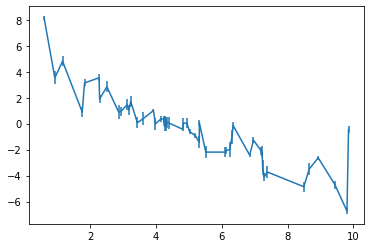

In [20]:
plt.errorbar(x, y, err) 

In [33]:
pendiente, interseccion, r_value, p_value, std_err = sp.stats.linregress(x, y)
print("pendiente: %f    interseccion: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

pendiente: -0.982162    interseccion: 4.577859
R-squared: 0.787198


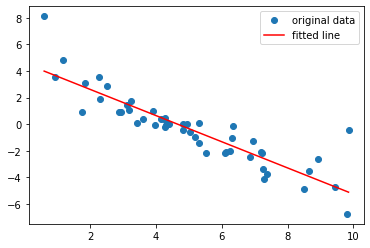

In [34]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, interseccion + pendiente*x, 'r', label='fitted line')
plt.legend()
plt.show()

Despues se hace el algoritmo de linear least squares
